# Exploratory Data Analysis

## About the dataset

#### **Creater**
[**Ramanathan**](https://www.kaggle.com/ramamet4)
Research Engineer at KIT, Karlsruhe Karlsruhe, Baden-Württemberg, Germany

#### **Data**
This data set contains more than 7000 Apple iOS mobile application details.
[link to the dataset page](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

##### **Columns in raw data table**
- **id**(id of this app)
- **track_name**(app name)
- **size_bytes**(size in bytes)
- **currency**(currency type)
- **price**(app price in appstore)
- **rating_count_tot**(total rate count)
- **rating_count_ver**(current version rate count) 
- **user_rating**(average user rating for all versions)
- **user_rating_ver**(average user rating for current version)
- **ver**(version number)
- **cont_rating**(content rating)
- **prime_genre**(primary genre)
- **sup_devices.num**(number of supporting devices)
- **ipadSc_urls.num**(number of screenshot showed for display in appstore)
- **lang.num**(number of supporting languages)
- **vpp_lic**(Vpp Device Based Licensing Enabled)

#### **Collection Date**
July 2017

#### **Purpose of the Dataset**
Trying to find the answer of How does the App details contribute the user ratings

## Load the dataset
- renaming the columns to more understandable names
- Dropping all the data that doesn't contain any user ratings
- Ordering the data by user rating, then by total rating count 

In [1]:
import project_functions as pf
df = pf.load_and_process('../../data/raw/AppleStore.csv')

## Explore dataset

#### **Numerical Values**
- using describe function to have a general look at all the numerical values


In [2]:
pf.profiling(df)

In [3]:
pf.describe(df)

,price,rating_count_tot,user_rating,sup_devices_num,screenshot_num,lang_num,size_Megabytes
count,6268.000000,6.268000e+03,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000
mean,1.821977,1.480381e+04,4.049697,37.259413,3.873803,5.890236,196.211804
std,6.128238,8.098468e+04,0.726943,3.907911,1.879707,8.202601,336.298105
min,0.000000,1.000000e+00,1.000000,9.000000,0.000000,0.000000,0.560000
25%,0.000000,7.800000e+01,4.000000,37.000000,4.000000,1.000000,49.322500
50%,0.000000,5.125000e+02,4.500000,37.000000,5.000000,1.000000,97.400000
75%,2.990000,3.963500e+03,4.500000,38.000000,5.000000,9.000000,179.742500
max,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000,3839.460000


### Correlation relationship
- trying to use pair plots to find any correlation relationship between user rating with other application values
#### **observations**
- there are a huge percent of applications appear to have a user rating than 2.5.
- there's not obvious correlarion is showed in all this plots.
- In the second plot, we can see that almost all low user rating appliction (user rating between 0 - 2.5) size is less than 1000Mb.
- there're some high price applications appear in high rating apps.
- In the last one, almost all low user rating appliction (user rating between 0 - 3.0) supported languages are less than 50.

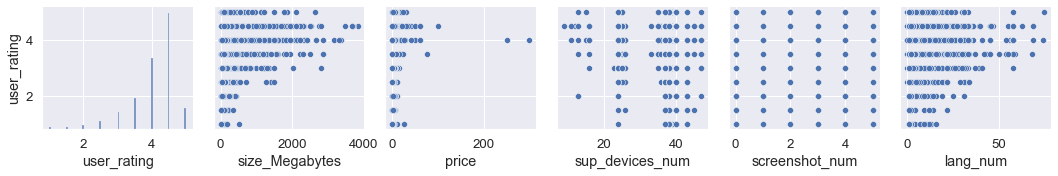

In [3]:
pf.correlation_user_rating(df)

- Visualize the value amount contained by each genre
#### observations
- Games take a huge percentage in this dataset
- If we want to discuss by different genres, some of genres' data are too samll to produce a convincing conclusion

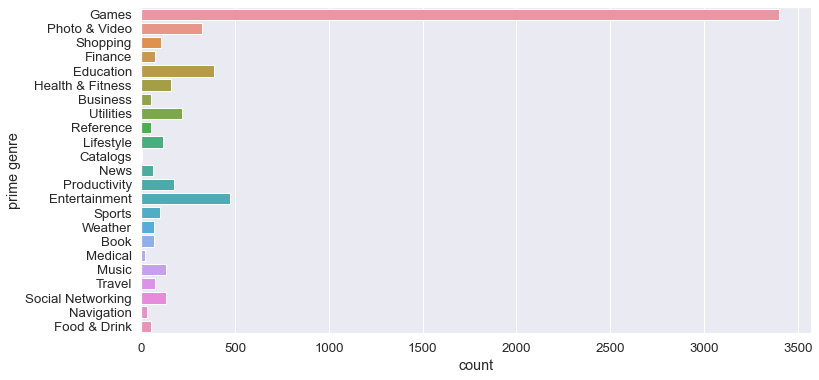

In [4]:
plot = pf.count_per_genre_plot(df)

## Initial Thoughts
#### **observations**
- The size, price and langage number pairplots aboves show the similar shift and distribution, and it's actually more densely distributed when user rating goes up.

## Wrangling
- Dropping useless columns for this project

In [5]:
pf.wrangling_data(df)

,size_bytes,currency,price,rating_count_tot,user_rating,prime_genre,lang_num,size_Megabytes
0,121319424,USD,0.00,481564,5.0,Games,11,115.70
1,157851648,USD,0.00,386521,5.0,Games,9,150.54
2,624107810,USD,0.99,326482,5.0,Games,13,595.20
3,1944321024,USD,0.00,257100,5.0,Games,11,1854.25
4,338273280,USD,0.99,143908,5.0,Games,1,322.60
...,...,...,...,...,...,...,...,...
6263,185029632,USD,1.99,1,1.0,Education,12,176.46
6264,127716352,USD,0.00,1,1.0,Games,1,121.80
6265,160161792,USD,0.00,1,1.0,Games,1,152.74
6266,177498112,USD,0.00,1,1.0,Games,1,169.28


## Research Question #1
Which genre most likely to have a full rating app?

- The boxplot below shows the distribution of user rating for each genres
- For answering this question, we only focus on the genres that have a more dense distribution on the right which are Games, Photo & Video, Health & Fitness, Business, Reference, Catalogs, Productivity, Book, Music.


<AxesSubplot:xlabel='user_rating', ylabel='prime_genre'>

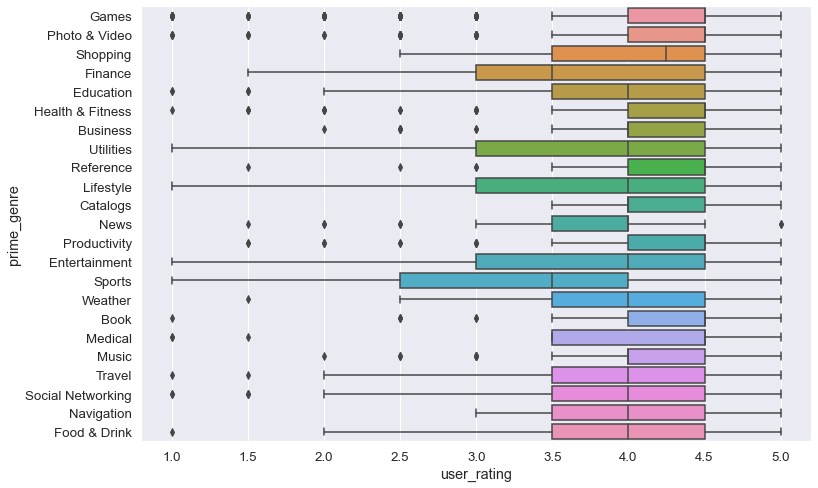

In [6]:
pf.q1_enre_rating_boxplot(df)

- dropping Business, Reference, Catalogs, Book from the genres that we selected above (dropping the rows contain too little data that cannot produce a convincing conclusion)
- remaining genres: Games, Photo & Vedio, Health & Fitness, Productivity, Music

In [7]:
data = pf.q1_genre_rating(df)
data

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,total
Games,0,0,15,10,29,44,133,301,927,1664,277,3400
Photo & Video,0,0,4,4,3,16,14,29,71,154,30,325
Shopping,0,0,0,0,0,5,10,14,24,41,12,106
Finance,0,0,0,6,3,6,8,14,10,20,4,71
Education,0,0,2,3,6,16,25,70,107,134,24,387
Health & Fitness,0,0,1,3,4,2,7,12,25,81,24,159
Business,0,0,0,0,1,5,2,4,15,22,4,53
Utilities,0,0,4,6,10,13,23,33,56,62,12,219
Reference,0,0,0,1,0,1,2,7,13,21,8,53
Lifestyle,0,0,4,7,4,12,10,10,29,29,8,113


In [8]:
pf.q1_answer(data)

,5.0,total
Games,277,3400
Photo & Video,30,325
Health & Fitness,24,159
Productivity,13,172
Music,6,134


### Plot for answering the Q: Which genre most likely to have a full rating app?

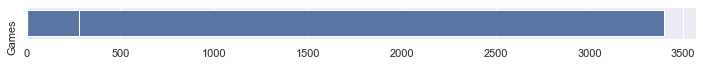

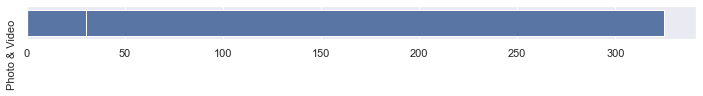

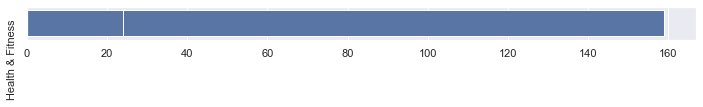

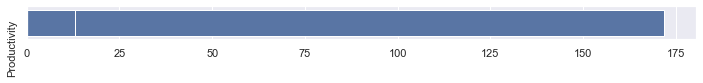

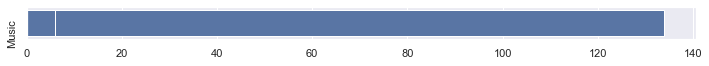

In [9]:
pf.q1_answer_plot(df)

### Conclusion for Q1
- By comparing the percentage of full rating amount in all genres, we can see Health & Fitness clearly have the highest percentage of full rating percentage, and it's the genre that most likely to have a full rating app.

## Research Question #2
Is higher rating means bigger application size?
- By seeing the joint plot and pair plot above, it's kind like there's some correlation relationship between size and rating

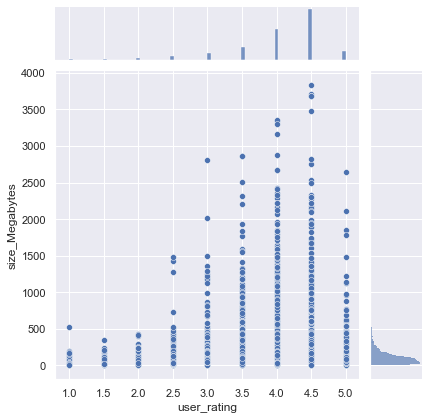

In [10]:
pf.q2_joint_plot(df)

By looking at the means of each rating applications' size, on average the size increase when the rating increase until 4.5

In [18]:
dataframe = pf.q2_size_mean_table(df)
dataframe

,user_rating,size means
0,5.0,150.116931
1,4.5,206.301100
2,4.0,227.344490
3,3.5,194.998034
4,3.0,161.568590
5,2.5,118.093418
6,2.0,84.671698
7,1.5,61.016071
8,1.0,60.188409


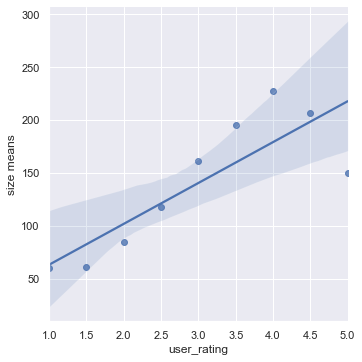

In [19]:
pf.lm_plot(dataframe,'size means')

So can we conclude that until rate 4.5 higher rating means bigger application size?
By looking at the count per rate plot, we actually see that 4.0 and 4.5 have much more collected values than any other rates.
That means almost 80 percent of all this applications has 4.0 - 4.5 rates and a size close to 200-200 Mbs.

<AxesSubplot:xlabel='user_rating', ylabel='count'>

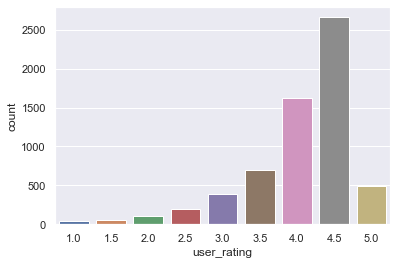

In [20]:
pf.q2_count_plot(df)

### Conclusion for Q2
- Although it's normal that a huge amount of data is between that rate 4.0-4.5, it's hard to conclude that higher rating means bigger application size. 
- Although the application's size range do appear lager with the rate become higher from 1.0 - 4.5

## Research Question #3
Is higher rating means higher price?

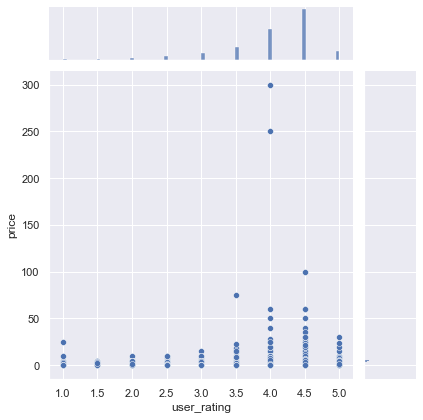

In [21]:
pf.q3_joint_plot(df)

In [22]:
dataframe = pf.q3_price_mean_table(df)
dataframe

,user_rating,price means
0,5.0,1.645589
1,4.5,1.802110
2,4.0,2.209865
3,3.5,1.757436
4,3.0,1.288068
5,2.5,1.103214
6,2.0,1.155755
7,1.5,1.208929
8,1.0,1.926591


### Conclusion for Q3:
- Although there's a rising trend from 1.5 to 4.0 and several points reach a really high level at 3.5 - 4.5, it still really hard to conclude that there's any correlation relationship just like previous question.
- The means of each rating applications' price table shows that there's even no trend exist. 

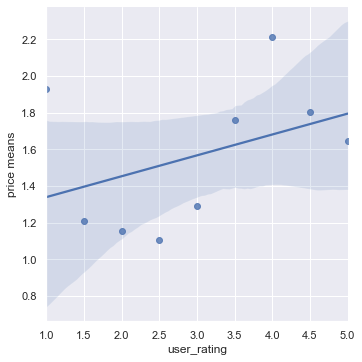

In [23]:
pf.lm_plot(dataframe,'price means')

## Research Question #4
Is higher rating means more language supported?
- The last pair plot above shows there's realtionship might be existed between language supported number with user rating

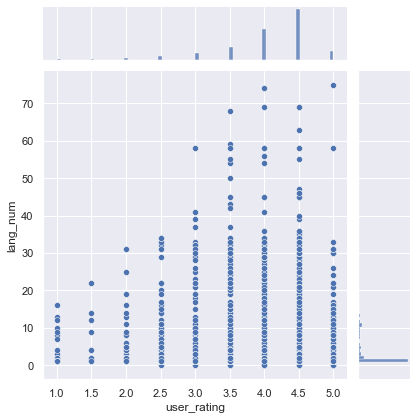

In [24]:
pf.q4_joint_plot(df)

In [25]:
dataframe = pf.q4_lang_mean_table(df)
dataframe

,user_rating,language supported means
0,5.0,4.674797
1,4.5,6.741645
2,4.0,5.911439
3,3.5,5.777778
4,3.0,4.057441
5,2.5,4.545918
6,2.0,2.915094
7,1.5,2.232143
8,1.0,2.727273


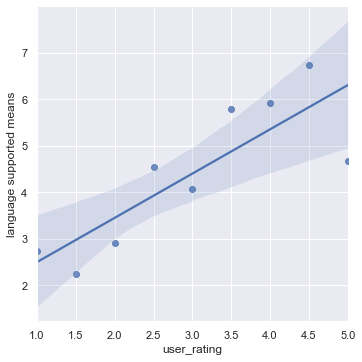

In [26]:
pf.lm_plot(dataframe,'language supported means')

### Conclusion for Q4:
- the application's language supported mean appear to have a rising trend when the rating increasing
- max language supported amount do appear lager with the rate become higher from 1.0 - 4.0
- hard to conclude that higher rating means more language supported